In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('nov2k_clean.csv')
df.head(5)

,Unnamed: 0,match_id,shotX,shotY,quarter,time_remaining,player,team,made,shot_type,distance,score,opp,status,date
0,0,200011010BOS,35.3,20.0,1st quarter,11:30.0,Jerry Stackhouse,DET,False,2-pointer,19,0-2,'DET',trails,2000-11-01
1,1,200011010BOS,13.1,17.7,1st quarter,11:13.0,Chucky Atkins,DET,False,2-pointer,17,0-2,'DET',trails,2000-11-01
2,2,200011010BOS,33.8,20.0,1st quarter,10:28.0,Billy Owens,DET,False,2-pointer,18,0-4,'DET',trails,2000-11-01
3,3,200011010BOS,21.7,8.0,1st quarter,10:22.0,Billy Owens,DET,False,2-pointer,4,0-4,'DET',trails,2000-11-01
4,4,200011010BOS,0.7,5.7,1st quarter,10:17.0,Jerry Stackhouse,DET,False,3-pointer,23,0-4,'DET',trails,2000-11-01


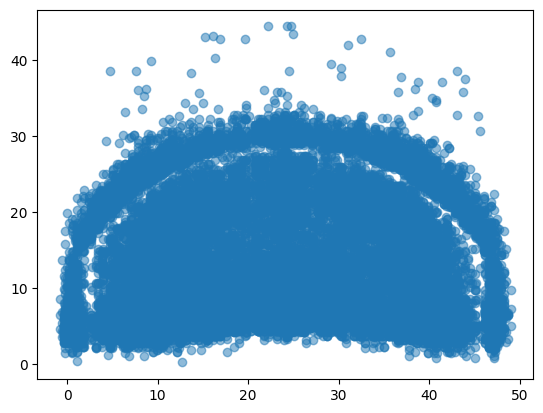

In [ ]:
plt.scatter(x=df['shotX'], y=df['shotY'],alpha=0.5)
plt.show()

In [ ]:
def assign_zone(x, y):
    # Three-point zones (beyond a certain range)
    if x <= 10 and y <= 10:
        return 1  # Left Corner 3
    elif x >= 40 and y <= 10:
        return 2  # Right Corner 3
    elif 20 <= x <= 30 and y >= 30:
        return 3  # Top of Arc 3
    elif x < 10 or x > 40:
        return 4  # Deep 3 from the sides
    elif y >= 35:
        return 5  # Deep straight-on 3



    # Two-point zones outside the paint
    if 10 < x < 20 and 10 < y < 25:
        return 6  # Left wing mid-range
    elif 30 < x < 40 and 10 < y < 25:
        return 7  # Right wing mid-range
    elif 20 <= x <= 30 and 20 <= y < 30:
        return 8  # Top of the key mid-range
    elif x < 10 and 10 <= y < 30:
        return 9  # Baseline left mid-range
    elif x > 40 and 10 <= y < 30:
        return 10  # Baseline right mid-range



    # Paint zones
    if 15 <= x <= 35 and 0 <= y <= 10:
        if 20 <= x <= 30:
            return 15  # At the rim (layups)
        return 14  # Restricted area within the paint
    elif 15 <= x <= 35 and 10 < y <= 20:
        return 11  # Paint (lower region)
    elif 15 <= x <= 35 and 20 < y <= 30:
        return 12  # Paint (upper region)
    elif 10 < x < 20 or 30 < x < 40:
        return 13  # Paint edges



    # Dunk zone (within 2 units of center rim)
    if abs(x - 25) <= 2 and abs(y - 5) <= 2:
        return 16  # Dunk zone




    return 0

## assigning zones
df['zone'] = df.apply(lambda row: assign_zone(row['shotX'], row['shotY']), axis=1)

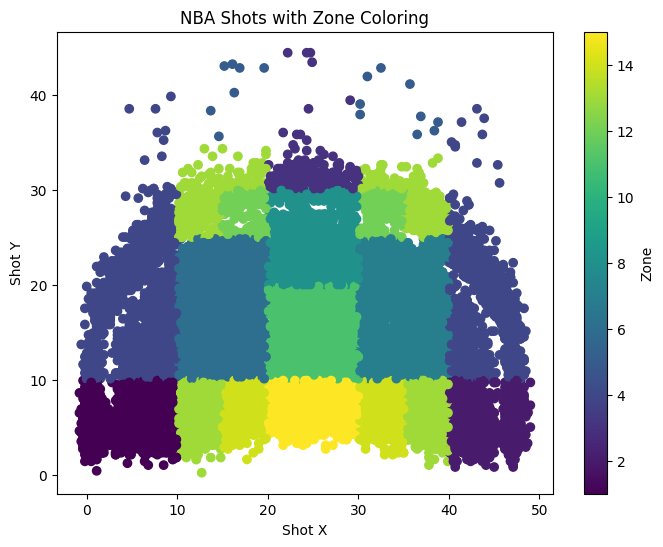

In [ ]:
## plot shots in the zones
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['shotX'], df['shotY'], c=df['zone'])
plt.colorbar(scatter, label='Zone')
plt.title('NBA Shots with Zone Coloring')
plt.xlabel('Shot X')
plt.ylabel('Shot Y')
plt.show()

In [ ]:
df.to_csv('nov2k_clean_with_zones.csv')